# Popis objektů

* Vstup: binární obraz 
* Výstup: binární obraz, vektor příznaků
* Cíl: popsat objekty čísly

## Identifikace oblastí

In [6]:
%pylab inline --no-import-all
import skimage
import skimage.io
# skimage.morphology.label => skimage.measure.label
import skimage.morphology
import skimage.measure
import matplotlib.pyplot as plt
import numpy as np


Populating the interactive namespace from numpy and matplotlib


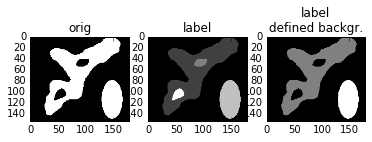

In [7]:
imrgb = skimage.io.imread('http://www.kky.zcu.cz/uploads/courses/zdo/lesson7/1.jpg')
im = skimage.color.rgb2gray(imrgb) > 0.5
imlabel0 = skimage.measure.label(im)
imlabel1 = skimage.measure.label(im, background=0)

plt.subplot(131)
plt.title('orig')
plt.imshow(im, cmap='gray')
plt.subplot(132)
plt.title('label')
plt.imshow(imlabel0, cmap='gray')
plt.subplot(133)
plt.title('label\ndefined backgr.')
plt.imshow(imlabel1, cmap='gray')

## Práce s oblastí

Následující příklad ukazuje vybrání zvolené oblasti

 labels  [-1  0  1]


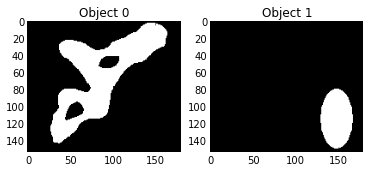

In [66]:
print "labels ", np.unique(imlabel)

plt.subplot(121)
plt.title('Object 0')
plt.imshow(imlabel==0, cmap='gray')
plt.subplot(122)
plt.title('Object 1')
plt.imshow(imlabel==1, cmap='gray')

## Jednoduché popisy oblastí

* Velikost
* Eulerovo číslo 
    $$E = S - N$$
    kde $S$ je počet souvislých oblastí a $N$ je počet děr
* Výška, šířka
* Projekce
![projekce0](http://www.kky.zcu.cz/uploads/courses/zdo/lesson7/projekce.jpg)
![projekce1](http://www.kky.zcu.cz/uploads/courses/zdo/lesson7/projekce2.jpg)

* Výstřednost - poměr délek nejdelší tětivy a nejdelší tětivy k ní kolmé
* Podlouhlost
* Pravoúhlost
* Směr
* Nekompaktnost 
    $$\textrm{nekompaktnost}=\frac{(\textrm{délka hranice})^2}{\textrm{velikost}}$$


Využijeme funkce [regionprops](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops). 


[-1  0  1]
Centroid:  (62.486293379994166, 84.672645086030911)
Area:  6858.0
Euler:  -2


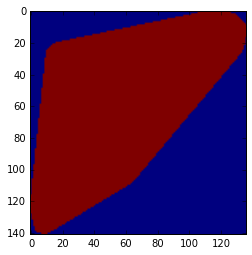

In [28]:
print np.unique(imlabel1)
props = skimage.measure.regionprops(imlabel1+1)

print "Centroid: ", props[0].centroid
print "Area: ", props[0].area
print "Euler: ", props[0].euler_number
ci = props[0].convex_image
plt.imshow(ci)

In [26]:
for i in range(len(props)):
    print "Id: ", i
    print "Centroid: ", props[i].centroid
    print "Area: ", props[i].area
    print "Euler: ", props[i].euler_number
    print ""

Id:  0
Centroid:  (62.486293379994166, 84.672645086030911)
Area:  6858.0
Euler:  -2

Id:  1
Centroid:  (113.5, 146.51309408341416)
Area:  2062.0
Euler:  0



In [31]:
## stara implementace

props0 = skimage.measure.regionprops(imlabel1==0)
props = props0
print "Centroid ", props[0].centroid
print "Area ", props[0].area
print "Euler ", props[0].euler_number


#print "Centroid 1 ", props[1].centroid

props1 = skimage.measure.regionprops(imlabel1==1)
props = props1
print "Centroid ", props[0].centroid
print "Area ", props[0].area
print "Euler ", props[0].euler_number




Centroid  (62.486293379994166, 84.672645086030911)
Area  6858.0
Euler  -2
Centroid  (113.5, 146.51309408341416)
Area  2062.0
Euler  0


## Freemanův řetězový kód

![freeman](http://www.mathworks.com/matlabcentral/fileexchange/screenshots/4718/original.jpg)

## Obecný momentový popis

Obecné momenty

$$ M_{ij} = \sum_x \sum_y x_i, y_j I (x,y) $$

[skimage.measure.moments()](http://scikit-image.org/docs/dev/api/skimage.measure.html#moments)

## Centrální moment

Souřadnice centroidu 
$ \bar{x} = \frac{M_{10}}{M_{00}}$
$ \bar{y} = \frac{M_{01}}{M_{00}}$

$$
\mu_{pq} = \sum_x \sum_y (x-\bar{x})^p (y-\bar{y})^q f(x,y)
$$
kde $f(x,y)$ je digitální obraz


[skimage.measure.moments_central()](http://scikit-image.org/docs/dev/api/skimage.measure.html#moments-central)

## Huovy momenty

Sedm momentů nezávislých na posunutí, změnu měřítka a rotaci. Prvních šest je nezávislých na zrcadlení. Poslední při zrcadlení mění znaménko.
$$ I_1 = \eta_{20} + \eta_{02}$$
$$ I_2 = (\eta_{20} - \eta_{02})^2 + 4\eta_{11}^2$$
$$ I_3 = (\eta_{30} - 3\eta_{12})^2 + (3\eta_{21} - \eta_{03})^2$$
$$ I_4 = (\eta_{30} + \eta_{12})^2 + (\eta_{21} + \eta_{03})^2 $$
$$ I_5 = (\eta_{30} - 3\eta_{12}) (\eta_{30} + \eta_{12})\left[ (\eta_{30} + \eta_{12})^2 - 3 (\eta_{21} + \eta_{03})^2\right] + (3 \eta_{21} - \eta_{03}) (\eta_{21} + \eta_{03})\left[ 3(\eta_{30} + \eta_{12})^2 -  (\eta_{21} + \eta_{03})^2\right]$$
$$ I_6 =  (\eta_{20} - \eta_{02})[(\eta_{30} + \eta_{12})^2 - (\eta_{21} + \eta_{03})^2] + 4\eta_{11}(\eta_{30} + \eta_{12})(\eta_{21} + \eta_{03})$$
$$ I_7 = (3 \eta_{21} - \eta_{03})(\eta_{30} + \eta_{12})\left[(\eta_{30} + \eta_{12})^2 - 3(\eta_{21} + \eta_{03})^2\right] - (\eta_{30} - 3\eta_{12})(\eta_{21} + \eta_{03})\left[3(\eta_{30} + \eta_{12})^2 - (\eta_{21} + \eta_{03})^2\right]$$
$$ $$
[Huovy momenty na wiky](http://en.wikipedia.org/wiki/Image_moment#Rotation_invariant_moments)

[skimage.measure.moments_hu()](http://scikit-image.org/docs/dev/api/skimage.measure.html#moments-hu)
